### **`Overview`**


> **Phân tích và trực quan hóa dữ liệu**:
Hiểu rõ cấu trúc và xu hướng của dữ liệu bằng `matplotlib` và `seaborn`.

> **Huấn luyện mô hình học máy và học sâu**:
Sử dụng `scikit-learn` và `xgboost` cho các mô hình học máy truyền thống.
Sử dụng `tensorflow` cho các mô hình học sâu, có khả năng xử lý bài toán phức tạp.

> **Dự đoán và biến đổi dữ liệu**:
Triển khai mô hình để dự đoán và biến đổi dữ liệu, kết hợp giữa các công cụ.

> **Đánh giá mô hình:**
Sử dụng các kỹ thuật đánh giá như `RMSE, MAE, R2` để đánh giá độ chính xác.


**Nguồn**: https://www.kaggle.com/datasets/sdolezel/black-friday/data

Tập dữ liệu này ghi lại các giao dịch mua hàng của người dùng, với thông tin về người mua, sản phẩm, và số tiền đã chi trả cho mỗi sản phẩm. Dưới đây là mô tả chi tiết về các cột:

1. **User_ID**: Mã định danh duy nhất cho mỗi người dùng, giúp phân biệt từng khách hàng trong dữ liệu.

2. **Product_ID**: Mã định danh duy nhất cho mỗi sản phẩm, dùng để theo dõi từng mặt hàng được mua.

3. **Gender**: Giới tính của người dùng, được phân loại là `'F' (nữ) hoặc 'M' (nam)`.

4. **Age**: Độ tuổi của người dùng, được phân thành các `nhóm tuổi` như "0-17", "26-35", "46-50", v.v., giúp nhận diện đặc điểm nhân khẩu học theo độ tuổi.

4. **Occupation**: Mã định danh cho n`ghề nghiệp` của người dùng. Giá trị này là số nguyên đại diện cho các ngành nghề khác nhau, giúp nghiên cứu ảnh hưởng của nghề nghiệp đến hành vi mua sắm.

5. **City_Category**: `Loại thành phố mà người dùng sống`. Đây có thể thể hiện kích thước hay mức độ phát triển của thành phố.

6. **Stay_In_Current_City_Years**: `Thời gian người dùng đã sống tại thành phố hiện tại`, được biểu thị bằng số năm. Giá trị "4+" chỉ người dùng đã ở thành phố trên 4 năm.

7. **Marital_Status**: Trạng thái hôn nhân của người dùng, với giá trị 0 cho người độc thân và 1 cho người đã kết hôn.

8. **Product_Category_1, Product_Category_2, Product_Category_3**: Các cột này chỉ `loại sản phẩm` theo các mã danh mục khác nhau. Một sản phẩm có thể thuộc nhiều danh mục, vì vậy có đến ba cột cho các danh mục bổ sung. Khi một danh mục không áp dụng cho sản phẩm, giá trị được đặt là NULL.

9. **Purchase** ✅ 🏁: Giá trị `mục tiêu` trong tập dữ liệu, biểu thị `số tiền chi tiêu cho mỗi giao dịch sản phẩm` của người dùng.




In [1]:
from pyspark.sql import SparkSession

# Tạo SparkSession
spark = SparkSession.builder.appName("BigDataAnalysis").getOrCreate()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# pip install pyspark

### **`Load dataset`**

In [4]:
import time

# Ghi lại thời điểm bắt đầu
start_time = time.time()

# Đọc file CSV bằng PySpark
df_train = spark.read.csv('/content/drive/MyDrive/Colab Notebooks/train.csv', header=True, inferSchema=True)

# Ghi lại thời điểm kết thúc
end_time = time.time()
df_train.show()
# Tính toán thời gian load
load_time = end_time - start_time
print(f"Thời gian load dữ liệu train: {load_time} giây")

# Ghi lại thời điểm bắt đầu
start_timet = time.time()

# Đọc file CSV bằng PySpark
df_test = spark.read.csv('/content/drive/MyDrive/Colab Notebooks/test.csv', header=True, inferSchema=True)

# Ghi lại thời điểm kết thúc
end_timet = time.time()
df_test.show()
# Tính toán thời gian load
load_time = end_timet - start_timet
print(f"Thời gian load dữ liệu test: {load_time} giây")



+-------+----------+------+-----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender|  Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
+-------+----------+------+-----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|1000001| P00069042|     F| 0-17|        10|            A|                         2|             0|                 3|              NULL|              NULL|    8370|
|1000001| P00248942|     F| 0-17|        10|            A|                         2|             0|                 1|                 6|                14|   15200|
|1000001| P00087842|     F| 0-17|        10|            A|                         2|             0|                12|              NULL|              NULL|    1422

### **`Check info dataset`**

In [5]:
print("train: ", df_train.count())
print("test: ", df_test.count())

train:  550068
test:  233599


In [6]:
df_train.printSchema()

root
 |-- User_ID: integer (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- City_Category: string (nullable = true)
 |-- Stay_In_Current_City_Years: string (nullable = true)
 |-- Marital_Status: integer (nullable = true)
 |-- Product_Category_1: integer (nullable = true)
 |-- Product_Category_2: integer (nullable = true)
 |-- Product_Category_3: integer (nullable = true)
 |-- Purchase: integer (nullable = true)



In [7]:
df_test.printSchema()

root
 |-- User_ID: integer (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- City_Category: string (nullable = true)
 |-- Stay_In_Current_City_Years: string (nullable = true)
 |-- Marital_Status: integer (nullable = true)
 |-- Product_Category_1: integer (nullable = true)
 |-- Product_Category_2: integer (nullable = true)
 |-- Product_Category_3: integer (nullable = true)



In [8]:
from pyspark.sql.functions import col, isnan, when, count

df_train.select(
    [count(when(col(c).isNull() | isnan(col(c)), c)).alias(c) for c in df_train.columns]
).show()


+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender|Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|      0|         0|     0|  0|         0|            0|                         0|             0|                 0|            173638|            383247|       0|
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+



In [9]:
from pyspark.sql.functions import col, isnan, when, count

df_test.select(
    [count(when(col(c).isNull() | isnan(col(c)), c)).alias(c) for c in df_test.columns]
).show()


+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+
|User_ID|Product_ID|Gender|Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+
|      0|         0|     0|  0|         0|            0|                         0|             0|                 0|             72344|            162562|
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+



In [10]:
df_train.describe().show()


+-------+------------------+----------+------+------+-----------------+-------------+--------------------------+-------------------+------------------+------------------+------------------+-----------------+
|summary|           User_ID|Product_ID|Gender|   Age|       Occupation|City_Category|Stay_In_Current_City_Years|     Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|         Purchase|
+-------+------------------+----------+------+------+-----------------+-------------+--------------------------+-------------------+------------------+------------------+------------------+-----------------+
|  count|            550068|    550068|550068|550068|           550068|       550068|                    550068|             550068|            550068|            376430|            166821|           550068|
|   mean|1003028.8424013031|      NULL|  NULL|  NULL|8.076706879876669|         NULL|         1.468494139793958|0.40965298835780306| 5.404270017525106| 9.84232925112238

In [11]:
print(df_train.columns)
print(len(df_train.columns))

['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']
12


### **`EDA and Features Engineering`**

#### Target: Purchase

Cột target cần predict

In [12]:
df_train.select("Purchase").summary().show()

+-------+-----------------+
|summary|         Purchase|
+-------+-----------------+
|  count|           550068|
|   mean|9263.968712959126|
| stddev|5023.065393820575|
|    min|               12|
|    25%|             5823|
|    50%|             8047|
|    75%|            12054|
|    max|            23961|
+-------+-----------------+



Text(0, 0.5, 'Tần suất')

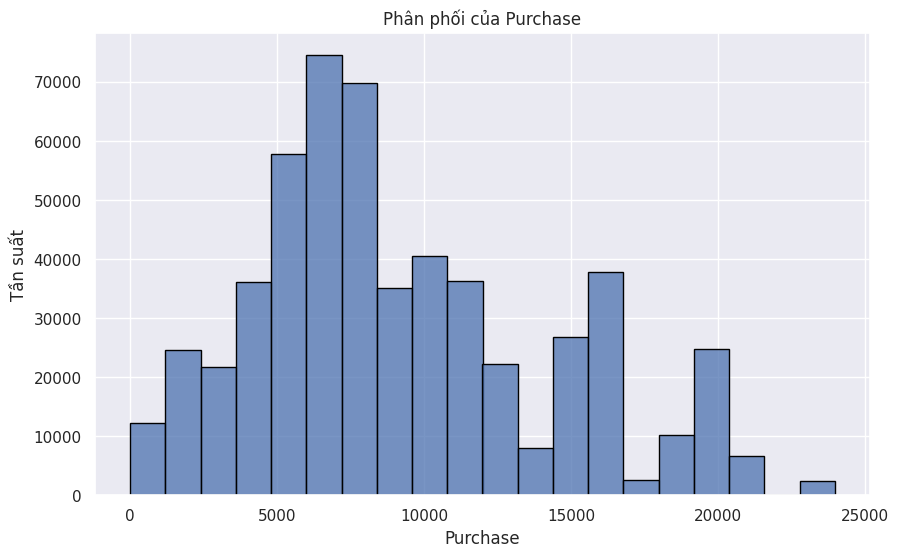

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()

# Chuyển đổi DataFrame PySpark thành Pandas DataFrame
purchase_counts_pd = df_train.select("Purchase").toPandas()

# Vẽ biểu đồ cột
fig , ax = plt.subplots(figsize=(10, 6))  # Điều chỉnh kích thước biểu đồ
sns.histplot(purchase_counts_pd["Purchase"], bins=20, edgecolor="black", ax=ax)  # Use histplot
ax.set_title("Phân phối của Purchase")
ax.set_xlabel("Purchase")
ax.set_ylabel("Tần suất")


#### User_ID & Product_ID

In [14]:
df_train.select('User_ID').distinct().count()

5891

In [15]:
df_test.select('User_ID').distinct().count()

5891

In [16]:
df_train.select('Product_ID').distinct().count()

3631

In [17]:
df_test.select('Product_ID').distinct().count()

3491

#### Gender

In [18]:
df_train.select('Gender').distinct().show()

+------+
|Gender|
+------+
|     F|
|     M|
+------+



In [19]:
df_test.select('Gender').distinct().show()

+------+
|Gender|
+------+
|     F|
|     M|
+------+



Text(0, 0.5, 'Tần suất')

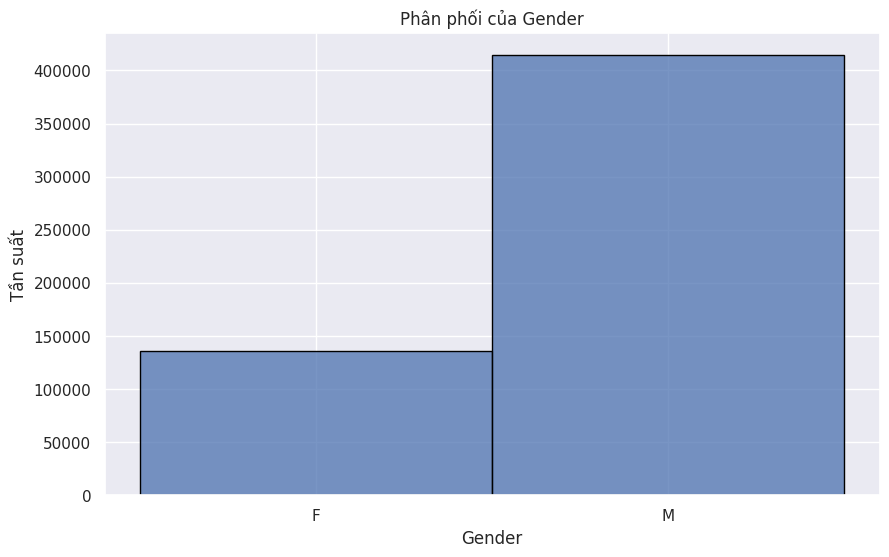

In [20]:
# Chuyển đổi DataFrame PySpark thành Pandas DataFrame
Gender_counts_pd = df_train.select("Gender").toPandas()

# Vẽ biểu đồ cột
fig , ax = plt.subplots(figsize=(10, 6))  # Điều chỉnh kích thước biểu đồ
sns.histplot(Gender_counts_pd["Gender"], bins=20, edgecolor="black", ax=ax)  # Use histplot
ax.set_title("Phân phối của Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Tần suất")

In [21]:
# # Ánh xạ giá trị trong cột 'Gender' thành số tương ứng
# df_train = df_train.withColumn("Gender",
#                    when(df_train["Gender"] == "F", 0)
#                    .when(df_train["Gender"] == "M", 1)
#                    .otherwise(None))  # None cho các giá trị khác nếu có

# # Ánh xạ giá trị trong cột 'Gender' thành số tương ứng
# df_test = df_test.withColumn("Gender",
#                    when(df_test["Gender"] == "F", 0)
#                    .when(df_test["Gender"] == "M", 1)
#                    .otherwise(None))  # None cho các giá trị khác nếu có

#### Age

In [22]:
df_train.select('Age').distinct().show()

+-----+
|  Age|
+-----+
|18-25|
|26-35|
| 0-17|
|46-50|
|51-55|
|36-45|
|  55+|
+-----+



In [23]:
df_test.select('Age').distinct().show()

+-----+
|  Age|
+-----+
|18-25|
|26-35|
| 0-17|
|46-50|
|51-55|
|36-45|
|  55+|
+-----+



Text(0, 0.5, 'Tần suất')

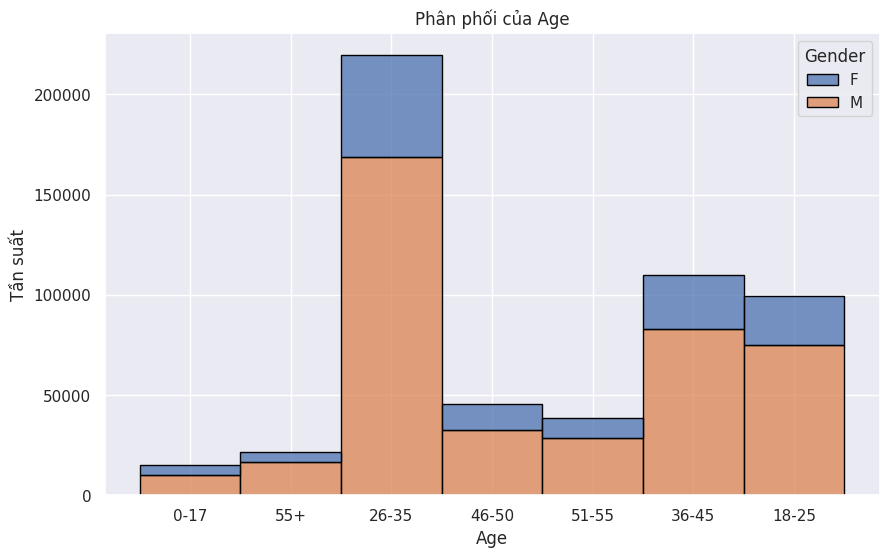

In [24]:
# Chuyển đổi DataFrame PySpark thành Pandas DataFrame
Age_counts_pd = df_train.select("Age","Gender").toPandas()

# Vẽ biểu đồ cột
fig , ax = plt.subplots(figsize=(10, 6))  # Điều chỉnh kích thước biểu đồ
sns.histplot(data=Age_counts_pd, x="Age", hue="Gender", edgecolor="black", multiple="stack", ax=ax)
ax.set_title("Phân phối của Age")
ax.set_xlabel("Age")
ax.set_ylabel("Tần suất")

In [25]:
df_train.groupBy('Age').count().show()

+-----+------+
|  Age| count|
+-----+------+
|18-25| 99660|
|26-35|219587|
| 0-17| 15102|
|46-50| 45701|
|51-55| 38501|
|36-45|110013|
|  55+| 21504|
+-----+------+



In [26]:
from pyspark.sql.functions import when

# Ánh xạ giá trị trong cột 'Age' thành số tương ứng
df_train = df_train.withColumn("Age",
                   when(df_train["Age"] == "0-17", 1)
                   .when(df_train["Age"] == "18-25", 2)
                   .when(df_train["Age"] == "26-35", 3)
                   .when(df_train["Age"] == "36-45", 4)
                   .when(df_train["Age"] == "46-50", 5)
                   .when(df_train["Age"] == "51-55", 6)
                   .when(df_train["Age"] == "55+", 7)
                   .otherwise(df_train["Age"]))  # Giữ nguyên nếu không thuộc các trường hợp trên

# Ánh xạ giá trị trong cột 'Age' thành số tương ứng
df_test = df_test.withColumn("Age",
                   when(df_test["Age"] == "0-17", 1)
                   .when(df_test["Age"] == "18-25", 2)
                   .when(df_test["Age"] == "26-35", 3)
                   .when(df_test["Age"] == "36-45", 4)
                   .when(df_test["Age"] == "46-50", 5)
                   .when(df_test["Age"] == "51-55", 6)
                   .when(df_test["Age"] == "55+", 7)
                   .otherwise(df_test["Age"]))  # Giữ nguyên nếu không thuộc các trường hợp trên


#### Occupation & City_category

In [27]:
df_train.select('Occupation').distinct().show()

+----------+
|Occupation|
+----------+
|        12|
|         1|
|        13|
|        16|
|         6|
|         3|
|        20|
|         5|
|        19|
|        15|
|         9|
|        17|
|         4|
|         8|
|         7|
|        10|
|        11|
|        14|
|         2|
|         0|
+----------+
only showing top 20 rows



In [28]:
df_train.select('City_Category').distinct().show()

+-------------+
|City_Category|
+-------------+
|            B|
|            C|
|            A|
+-------------+



In [29]:
df_test.select('City_Category').distinct().show()

+-------------+
|City_Category|
+-------------+
|            B|
|            C|
|            A|
+-------------+



Text(0, 0.5, 'Tần suất')

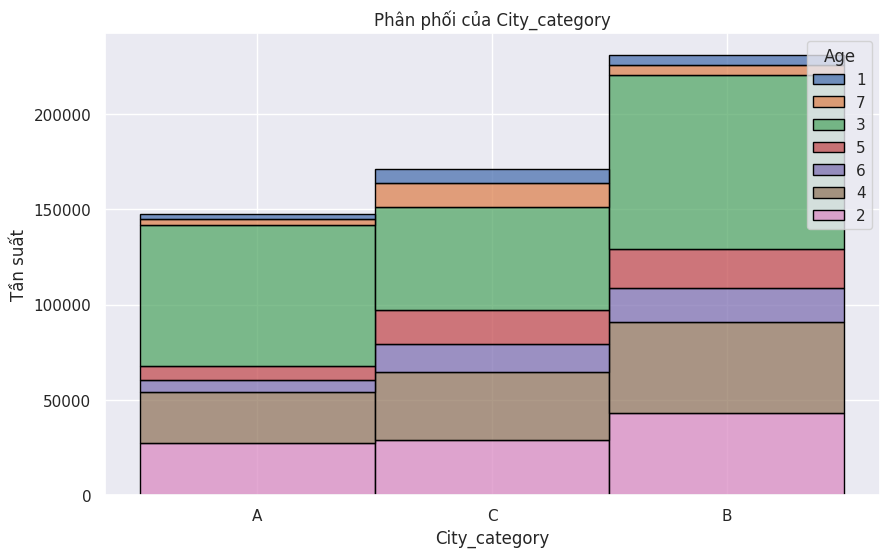

In [30]:
# Chuyển đổi DataFrame PySpark thành Pandas DataFrame
City_category_counts_pd = df_train.select("City_category","Age").toPandas()

# Vẽ biểu đồ cột
fig , ax = plt.subplots(figsize=(10, 6))  # Điều chỉnh kích thước biểu đồ
sns.histplot(City_category_counts_pd, x="City_category", hue = "Age", multiple="stack" ,edgecolor="black", ax=ax)  # Use histplot
ax.set_title("Phân phối của City_category")
ax.set_xlabel("City_category")
ax.set_ylabel("Tần suất")

In [31]:
# # Ánh xạ giá trị trong cột 'City_Category' thành số tương ứng
# df_train = df_train.withColumn("City_Category",
#                    when(df_train["City_Category"] == "A", 1)
#                    .when(df_train["City_Category"] == "B", 2)
#                    .when(df_train["City_Category"] == "C", 3)
#                    .otherwise(df_train["City_Category"]))  # Giữ nguyên nếu không thuộc các trường hợp trên

# df_test = df_test.withColumn("City_Category",
#                    when(df_test["City_Category"] == "A", 1)
#                    .when(df_test["City_Category"] == "B", 2)
#                    .when(df_test["City_Category"] == "C", 3)
#                    .otherwise(df_test["City_Category"]))  # Giữ nguyên nếu không thuộc các trường hợp trên


#### Stay_In_Current_City_Years

In [32]:
df_train.select('Stay_In_Current_City_Years').distinct().show()

+--------------------------+
|Stay_In_Current_City_Years|
+--------------------------+
|                         3|
|                         0|
|                        4+|
|                         1|
|                         2|
+--------------------------+



In [33]:
df_test.select('Stay_In_Current_City_Years').distinct().show()

+--------------------------+
|Stay_In_Current_City_Years|
+--------------------------+
|                         3|
|                         0|
|                        4+|
|                         1|
|                         2|
+--------------------------+



In [34]:
from pyspark.sql.functions import regexp_replace

# Loại bỏ ký tự '+' trong cột 'Stay_In_Current_City_Years'
df_train = df_train.withColumn("Stay_In_Current_City_Years",
                   regexp_replace("Stay_In_Current_City_Years", "\+", ""))
# Loại bỏ ký tự '+' trong cột 'Stay_In_Current_City_Years'
df_test = df_test.withColumn("Stay_In_Current_City_Years",
                   regexp_replace("Stay_In_Current_City_Years", "\+", ""))



Text(0, 0.5, 'Tần suất')

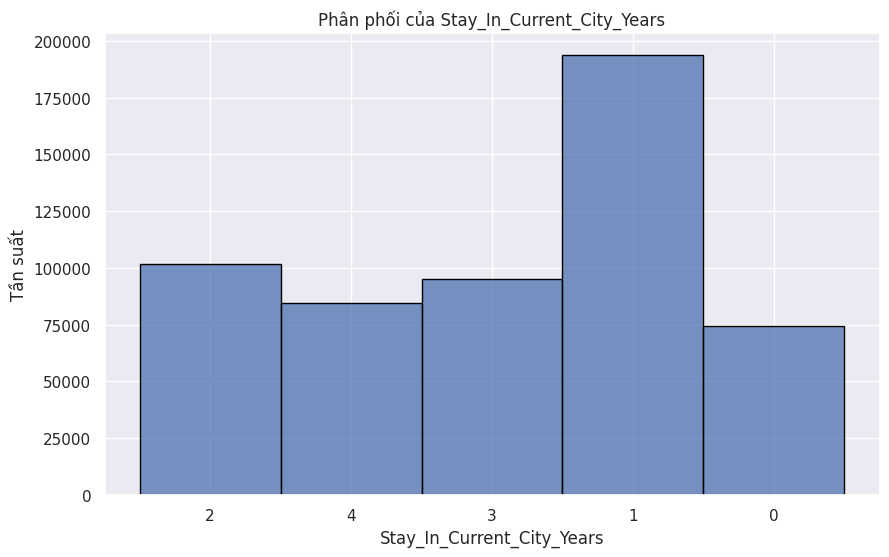

In [35]:
# Chuyển đổi DataFrame PySpark thành Pandas DataFrame
Stay_In_Current_City_Years_counts_pd = df_train.select("Stay_In_Current_City_Years").toPandas()

# Vẽ biểu đồ cột
fig , ax = plt.subplots(figsize=(10, 6))  # Điều chỉnh kích thước biểu đồ
sns.histplot(Stay_In_Current_City_Years_counts_pd["Stay_In_Current_City_Years"], bins=20, edgecolor="black", ax=ax)  # Use histplot
ax.set_title("Phân phối của Stay_In_Current_City_Years")
ax.set_xlabel("Stay_In_Current_City_Years")
ax.set_ylabel("Tần suất")

#### Marital_Status

In [36]:
df_train.select('Marital_Status').distinct().show()

+--------------+
|Marital_Status|
+--------------+
|             1|
|             0|
+--------------+



Text(0, 0.5, 'Tần suất')

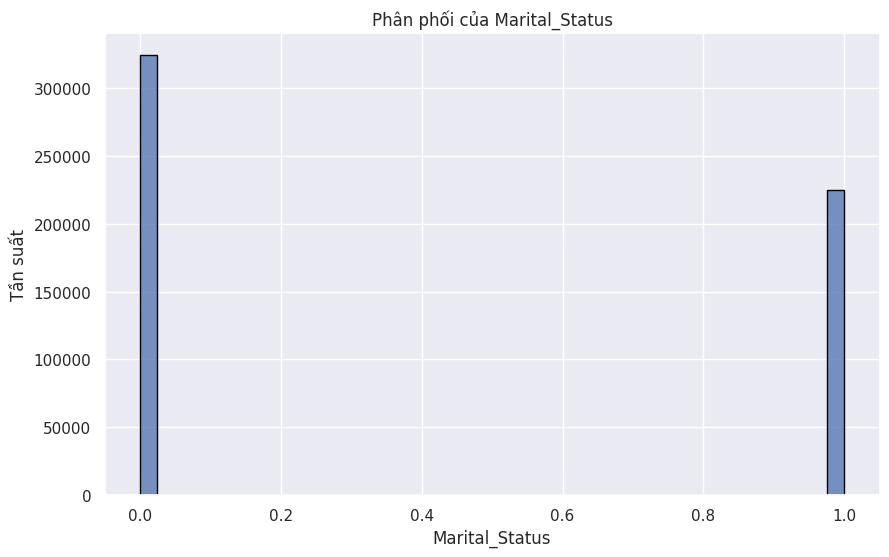

In [37]:
# Chuyển đổi DataFrame PySpark thành Pandas DataFrame
Marital_Status_counts_pd = df_train.select("Marital_Status").toPandas()

# Vẽ biểu đồ cột
fig , ax = plt.subplots(figsize=(10, 6))  # Điều chỉnh kích thước biểu đồ
sns.histplot(data=Marital_Status_counts_pd, x="Marital_Status" ,edgecolor="black", ax=ax)  # Use histplot
ax.set_title("Phân phối của Marital_Status")
ax.set_xlabel("Marital_Status")
ax.set_ylabel("Tần suất")

#### Product_category_1, Product_category_2, Product_category_3

In [38]:
df_train.select('Product_Category_1').distinct().show()

+------------------+
|Product_Category_1|
+------------------+
|                12|
|                 1|
|                13|
|                 6|
|                16|
|                 3|
|                 5|
|                15|
|                17|
|                 9|
|                 4|
|                 8|
|                 7|
|                10|
|                11|
|                14|
|                 2|
|                18|
|                20|
|                19|
+------------------+



Text(0, 0.5, 'Tần suất')

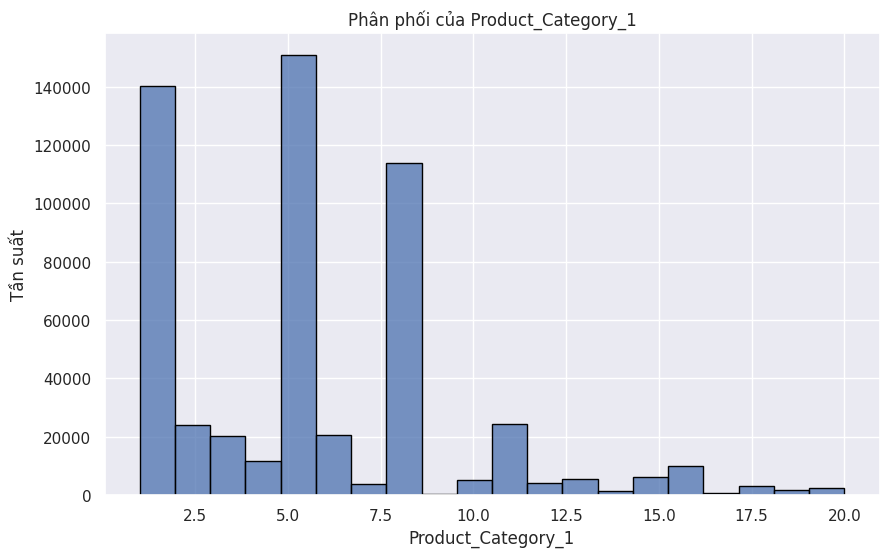

In [39]:
# Chuyển đổi DataFrame PySpark thành Pandas DataFrame
Product_Category_1_counts_pd = df_train.select("Product_Category_1").toPandas()

# Vẽ biểu đồ cột
fig , ax = plt.subplots(figsize=(10, 6))  # Điều chỉnh kích thước biểu đồ
sns.histplot(Product_Category_1_counts_pd["Product_Category_1"], bins=20, edgecolor="black", ax=ax)  # Use histplot
ax.set_title("Phân phối của Product_Category_1")
ax.set_xlabel("Product_Category_1")
ax.set_ylabel("Tần suất")

In [40]:
# from pyspark.sql.functions import when, col, lit

# # Define a list of categories to keep
# keep_categories = ["1", "8", "5"]

# # Apply the transformation using when and isin
# df_train = df_train.withColumn(
#     "Product_Category_1",
#     when(col("Product_Category_1").isin(keep_categories), col("Product_Category_1"))
#     .otherwise(lit("other"))  # Assign "other" if not in keep_categories
# )

In [41]:
df_train.select('Product_Category_2').distinct().show()

+------------------+
|Product_Category_2|
+------------------+
|                12|
|                13|
|                 6|
|                16|
|                 3|
|                 5|
|                15|
|                 9|
|                17|
|                 4|
|                 8|
|                 7|
|                10|
|                11|
|                14|
|                 2|
|                18|
|              NULL|
+------------------+



Text(0, 0.5, 'Tần suất')

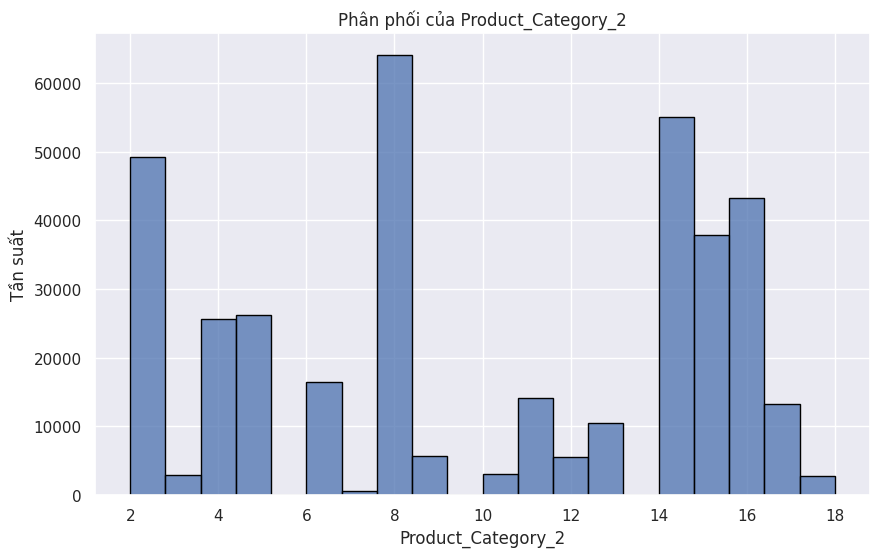

In [42]:
# Chuyển đổi DataFrame PySpark thành Pandas DataFrame
Product_Category_2_counts_pd = df_train.select("Product_Category_2").toPandas()

# Vẽ biểu đồ cột
fig , ax = plt.subplots(figsize=(10, 6))  # Điều chỉnh kích thước biểu đồ
sns.histplot(Product_Category_2_counts_pd["Product_Category_2"], bins=20, edgecolor="black", ax=ax)  # Use histplot
ax.set_title("Phân phối của Product_Category_2")
ax.set_xlabel("Product_Category_2")
ax.set_ylabel("Tần suất")

In [43]:
# # Define a list of categories to keep
# keep_categories = ["14", "8", "2","16"]

# # Apply the transformation using when and isin
# df_train = df_train.withColumn(
#     "Product_Category_2",
#     when(col("Product_Category_2").isin(keep_categories), col("Product_Category_2"))
#     .otherwise(lit("other"))  # Assign "other" if not in keep_categories
# )

In [44]:
df_train.select('Product_Category_3').distinct().show()

+------------------+
|Product_Category_3|
+------------------+
|                12|
|                13|
|                16|
|                 6|
|                 3|
|                 5|
|                15|
|                17|
|                 9|
|                 4|
|                 8|
|                10|
|                11|
|                14|
|                18|
|              NULL|
+------------------+



Text(0, 0.5, 'Tần suất')

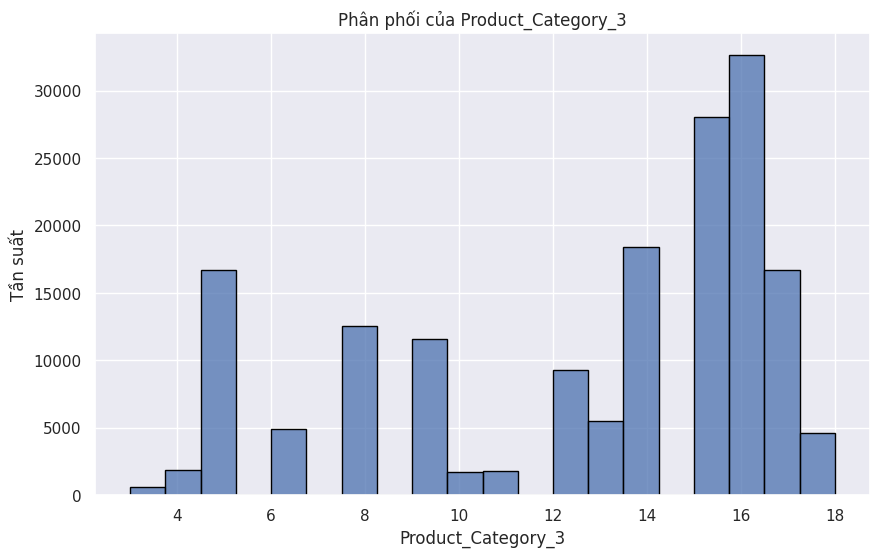

In [45]:
# Chuyển đổi DataFrame PySpark thành Pandas DataFrame
Product_Category_3_counts_pd = df_train.select("Product_Category_3").toPandas()

# Vẽ biểu đồ cột
fig , ax = plt.subplots(figsize=(10, 6))  # Điều chỉnh kích thước biểu đồ
sns.histplot(Product_Category_3_counts_pd["Product_Category_3"], bins=20, edgecolor="black", ax=ax)  # Use histplot
ax.set_title("Phân phối của Product_Category_3")
ax.set_xlabel("Product_Category_3")
ax.set_ylabel("Tần suất")

In [46]:
# # Define a list of categories to keep
# keep_categories = ["16", "15", "14","17","5"]

# # Apply the transformation using when and isin
# df_train = df_train.withColumn(
#     "Product_Category_3",
#     when(col("Product_Category_3").isin(keep_categories), col("Product_Category_3"))
#     .otherwise(lit("other"))  # Assign "other" if not in keep_categories
# )

In [47]:
df_train.groupBy('Product_Category_3').count().show()

+------------------+------+
|Product_Category_3| count|
+------------------+------+
|                12|  9246|
|              NULL|383247|
|                13|  5459|
|                16| 32636|
|                 6|  4890|
|                 3|   613|
|                 5| 16658|
|                15| 28013|
|                17| 16702|
|                 9| 11579|
|                 4|  1875|
|                 8| 12562|
|                10|  1726|
|                11|  1805|
|                14| 18428|
|                18|  4629|
+------------------+------+



In [48]:
df_train.groupBy('Product_ID').count().show()

+----------+-----+
|Product_ID|count|
+----------+-----+
|  P0098242|  233|
| P00281742|  115|
| P00026042|  379|
| P00015342|  147|
| P00159842|  118|
| P00162642|   80|
| P00048442|  349|
| P00078842|   72|
| P00313242|  327|
| P00318342|   28|
|  P0096342|  180|
| P00146342|   79|
| P00180642|   69|
| P00256142|    3|
| P00323242|   10|
| P00122142|    2|
| P00162742|    1|
| P00014542|  672|
| P00331542|  155|
| P00212242|  264|
+----------+-----+
only showing top 20 rows



In [49]:
df_train.columns

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

### **`Preprocessing`**

In [50]:
categorical_features = [
 'Gender',
 'City_Category',
 'Marital_Status',
 ]
numerical_features = [
 'Age',
 'Occupation',
 'Stay_In_Current_City_Years',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

In [51]:
from pyspark.sql.functions import col
from pyspark.sql.types import StringType, IntegerType


for feature in categorical_features:
    df_train = df_train.withColumn(feature, col(feature).cast(StringType()))
    df_test = df_test.withColumn(feature, col(feature).cast(StringType()))
for feature in numerical_features:
    df_train = df_train.withColumn(feature, col(feature).cast(IntegerType()))
    df_test = df_test.withColumn(feature, col(feature).cast((IntegerType())))


In [52]:
df_train.printSchema()

root
 |-- User_ID: integer (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- City_Category: string (nullable = true)
 |-- Stay_In_Current_City_Years: integer (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Product_Category_1: integer (nullable = true)
 |-- Product_Category_2: integer (nullable = true)
 |-- Product_Category_3: integer (nullable = true)
 |-- Purchase: integer (nullable = true)



In [53]:
from pyspark.sql.functions import col, isnan, when, count

df_train.select(
    [count(when(col(c).isNull() | isnan(col(c)), c)).alias(c) for c in df_train.columns]
).show()


+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender|Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|      0|         0|     0|  0|         0|            0|                         0|             0|                 0|            173638|            383247|       0|
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+



In [54]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# Tạo bảng đếm số lần xuất hiện của mỗi giá trị trong Product_Category_3 theo Product_ID
# mode_df = (
#     df_train
#     .groupBy("Product_ID", "Product_Category_3")
#     .count()
#     .withColumn("rank", F.row_number().over(
#         Window.partitionBy("Product_ID").orderBy(F.desc("count"))
#     ))
#     .filter(F.col("rank") == 1)
#     .select("Product_ID", "Product_Category_3")
# )
# mode_df.show()



In [55]:
# df_train1 = df_train
# # Đổi tên cột `Product_Category_3` trong mode_df để tránh trùng lặp
# mode_df = mode_df.withColumnRenamed("Product_Category_3", "Product_Category_3_mode")

# # Thực hiện left join và sử dụng cột mode để điền giá trị NaN
# df_train1 = (
#     df_train1
#     .join(mode_df, on="Product_ID", how="left")
#     .withColumn(
#         "Product_Category_3",
#         F.coalesce("Product_Category_3", "Product_Category_3_mode")
#     )
#     .drop("Product_Category_3_mode")  # Xóa cột tạm sau khi sử dụng xong
# )

# # Hiển thị kết quả
# df_train1.show()


In [56]:
# df_train1.select(
#     [count(when(col(c).isNull() | isnan(col(c)), c)).alias(c) for c in df_train.columns]
# ).show()

#### Fill NA in Product_Category_2, Product_Category_3

In [57]:
from pyspark.sql import functions as F

# train
# Tìm giá trị xuất hiện nhiều nhất (mode) trong cột Product_Category_2, bỏ qua các giá trị NULL
mode_row = df_train.filter(F.col("Product_Category_2").isNotNull()) \
                   .groupBy("Product_Category_2") \
                   .count() \
                   .orderBy(F.desc("count")) \
                   .first()


mode_value = mode_row["Product_Category_2"]

# Thay thế các giá trị NULL bằng mode_value
df_train = df_train.withColumn(
    "Product_Category_2",
    F.when(F.col("Product_Category_2").isNull(), F.lit(mode_value)).otherwise(F.col("Product_Category_2")))

# test
# Tìm giá trị xuất hiện nhiều nhất (mode) trong cột Product_Category_2, bỏ qua các giá trị NULL
mode_row_test = df_test.filter(F.col("Product_Category_2").isNotNull()) \
                   .groupBy("Product_Category_2") \
                   .count() \
                   .orderBy(F.desc("count")) \
                   .first()


mode_value = mode_row_test["Product_Category_2"]

# Thay thế các giá trị NULL bằng mode_value
df_test = df_test.withColumn(
    "Product_Category_2",
    F.when(F.col("Product_Category_2").isNull(), F.lit(mode_value)).otherwise(F.col("Product_Category_2")))

In [58]:
df_train.select(
    [count(when(col(c).isNull() | isnan(col(c)), c)).alias(c) for c in df_train.columns]
).show()

df_test.select(
    [count(when(col(c).isNull() | isnan(col(c)), c)).alias(c) for c in df_test.columns]
).show()

+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender|Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|      0|         0|     0|  0|         0|            0|                         0|             0|                 0|                 0|            383247|       0|
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+

+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+
|User_ID|Product_I

In [59]:
# train
# Tìm giá trị xuất hiện nhiều nhất (mode) trong cột Product_Category_3, bỏ qua các giá trị NULL
mode_row = df_train.filter(F.col("Product_Category_3").isNotNull()) \
                   .groupBy("Product_Category_3") \
                   .count() \
                   .orderBy(F.desc("count")) \
                   .first()


mode_value = mode_row["Product_Category_3"]

# Thay thế các giá trị NULL bằng mode_value
df_train = df_train.withColumn(
    "Product_Category_3",
    F.when(F.col("Product_Category_3").isNull(), F.lit(mode_value)).otherwise(F.col("Product_Category_3")))
df_train.select(
    [count(when(col(c).isNull() | isnan(col(c)), c)).alias(c) for c in df_train.columns]
).show()

# test
#  Tìm giá trị xuất hiện nhiều nhất (mode) trong cột Product_Category_3, bỏ qua các giá trị NULL
mode_row_test = df_test.filter(F.col("Product_Category_3").isNotNull()) \
                   .groupBy("Product_Category_3") \
                   .count() \
                   .orderBy(F.desc("count")) \
                   .first()


mode_value = mode_row_test["Product_Category_3"]

# Thay thế các giá trị NULL bằng mode_value
df_test = df_test.withColumn(
    "Product_Category_3",
    F.when(F.col("Product_Category_3").isNull(), F.lit(mode_value)).otherwise(F.col("Product_Category_3")))
df_test.select(
    [count(when(col(c).isNull() | isnan(col(c)), c)).alias(c) for c in df_test.columns]
).show()

+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender|Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|      0|         0|     0|  0|         0|            0|                         0|             0|                 0|                 0|                 0|       0|
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+

+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+
|User_ID|Product_I

### **` Model training and Validation`**

In [60]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import Imputer, StandardScaler, OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.sql import SparkSession

# 1. Xử lý các cột số với Imputer và StandardScaler
num_imputer = Imputer(inputCols=numerical_features, outputCols=[f"{c}_imputed" for c in numerical_features])
num_assembler = VectorAssembler(inputCols=[f"{c}_imputed" for c in numerical_features], outputCol="num_features")
num_scaler = StandardScaler(inputCol="num_features", outputCol="scaled_num_features")

# 2. Xử lý các cột phân loại với Imputer và OneHotEncoder
# Đầu tiên, dùng StringIndexer để chuyển đổi giá trị phân loại thành chỉ số số
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_indexed",handleInvalid="keep") for col in categorical_features]

# Mã hóa OneHot
encoder = OneHotEncoder(inputCols=[f"{col}_indexed" for col in categorical_features],
                        outputCols=[f"{col}_encoded" for col in categorical_features])

# 3. Kết hợp tất cả các cột vào một VectorAssembler
assembler = VectorAssembler(
    inputCols=["scaled_num_features"] + [f"{col}_encoded" for col in categorical_features],
    outputCol="features"
)
# assembler = VectorAssembler(
#     inputCols= [f"{col}_encoded" for col in categorical_features],
#     outputCol="features"
# )

# pipeline = Pipeline(stages= indexers + [encoder, assembler])
# 4. Tạo Pipeline
pipeline = Pipeline(stages=[num_imputer, num_assembler, num_scaler] + indexers + [encoder, assembler])

# Áp dụng Pipeline lên dữ liệu
pipeline_model = pipeline.fit(df_train)
df_transformed = pipeline_model.transform(df_train)


# Xem dữ liệu sau khi xử lý
X = df_transformed.select(["features","Purchase"])



In [61]:
X.show()

+--------------------+--------+
|            features|Purchase|
+--------------------+--------+
|[0.73875342366319...|    8370|
|[0.73875342366319...|   15200|
|[0.73875342366319...|    1422|
|[0.73875342366319...|    1057|
|[5.17127396564236...|    7969|
|[2.21626027098958...|   15227|
|[3.69376711831597...|   19215|
|[3.69376711831597...|   15854|
|[3.69376711831597...|   15686|
|[2.21626027098958...|    7871|
|[2.21626027098958...|    5254|
|[2.21626027098958...|    3957|
|[2.21626027098958...|    6073|
|[2.21626027098958...|   15665|
|[4.43252054197916...|    5378|
|[4.43252054197916...|    2079|
|[4.43252054197916...|   13055|
|[4.43252054197916...|    8851|
|[2.95501369465278...|   11788|
|[2.21626027098958...|   19614|
+--------------------+--------+
only showing top 20 rows



In [62]:
from pyspark.sql import Window
from pyspark.sql import functions as F


# Chia tập dữ liệu thành train và validation (80-20)
train_data, valid_data = X.randomSplit([0.8, 0.2], seed=2004)

# Tách lại X và y cho tập train và validation
X_train = train_data.drop("Purchase")  # Bỏ cột Purchase khỏi X_train
y_train = train_data.select("Purchase")  # Chỉ lấy cột Purchase cho y_train
X_valid = valid_data.drop("Purchase")  # Bỏ cột Purchase khỏi X_valid
y_valid = valid_data.select("Purchase")  # Chỉ lấy cột Purchase cho y_valid



#### **Randomforest** - Bagging

In [63]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler


# Khởi tạo RandomForestRegressor
rf = RandomForestRegressor(featuresCol="features", labelCol="Purchase", predictionCol="prediction",numTrees=30,
    maxDepth=10
    )
rf_mode = rf.fit(train_data)
# Dự đoán trên tập validation
predictions = rf_mode.transform(valid_data)

# Hiển thị kết quả dự đoán
predictions.select("Purchase", "prediction").show(20)

# Đánh giá mô hình với RMSE (Root Mean Squared Error)
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="Purchase", predictionCol="prediction", metricName="rmse")

# Tính RMSE trên tập validation
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on validation data: {rmse}")


+--------+------------------+
|Purchase|        prediction|
+--------+------------------+
|   19536|  14187.1435911139|
|   11937|13648.108351512567|
|    8336|13751.757267086363|
|   15690|12855.533134034458|
|    8233| 8638.243277308235|
|    8221| 8684.918521214384|
|    3461| 3048.843929119936|
|    4056|7753.4988765876105|
|    3940| 8138.201910416913|
|   11682|13303.495037011557|
|    4316|12940.060743069818|
|   15214|12940.060743069818|
|   15287|12943.093418679147|
|    6557|11048.884590243108|
|    6443|10132.982902753254|
|   12872|10132.982902753254|
|    9892|12134.739510943476|
|   15937| 14420.21348402785|
|    7822| 7782.842246755993|
|    8067| 7782.842246755993|
+--------+------------------+
only showing top 20 rows

Root Mean Squared Error (RMSE) on validation data: 3280.1804411919347


In [64]:
from pyspark.ml.evaluation import RegressionEvaluator
# Đánh giá mô hình với RMSE, MAE và R2
evaluator_rmse = RegressionEvaluator(labelCol="Purchase", predictionCol="prediction", metricName="rmse")
evaluator_mae = RegressionEvaluator(labelCol="Purchase", predictionCol="prediction", metricName="mae")
evaluator_r2 = RegressionEvaluator(labelCol="Purchase", predictionCol="prediction", metricName="r2")

# Tính RMSE, MAE và R2 trên tập validation
rmse = evaluator_rmse.evaluate(predictions)
mae = evaluator_mae.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)

# In kết quả đánh giá
print(f"Root Mean Squared Error (RMSE) on validation data: {rmse}")
print(f"Mean Absolute Error (MAE) on validation data: {mae}")
print(f"R-squared (R2) on validation data: {r2}")

Root Mean Squared Error (RMSE) on validation data: 3280.1804411919347
Mean Absolute Error (MAE) on validation data: 2473.653230814329
R-squared (R2) on validation data: 0.5718030992235026


(0.0, 25000.0)

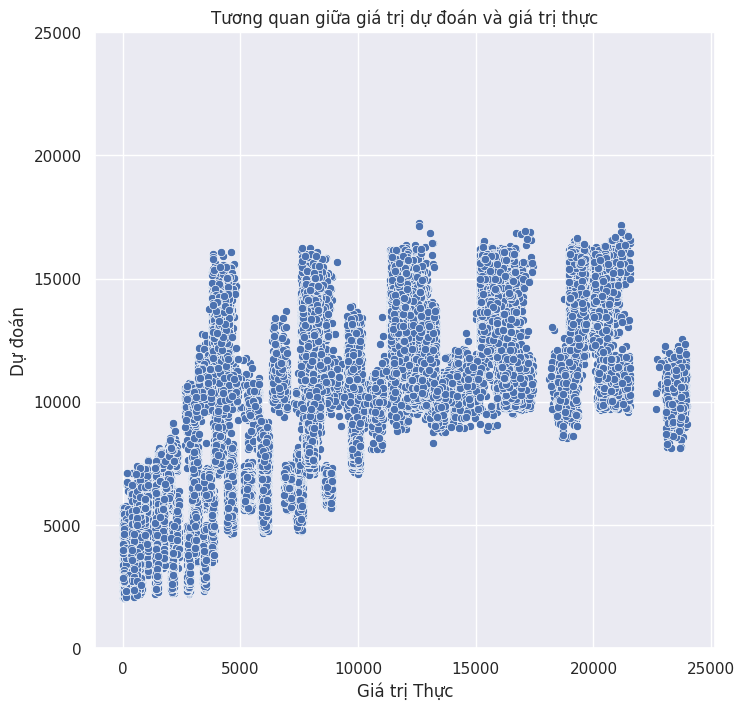

In [65]:
fig , ax = plt.subplots(figsize=(8, 8))  # Điều chỉnh kích thước biểu đồ
sns.scatterplot(x="Purchase", y="prediction", data=predictions.toPandas(), ax=ax)
ax.set_title("Tương quan giữa giá trị dự đoán và giá trị thực")
ax.set_xlabel("Giá trị Thực")
ax.set_ylabel("Dự đoán")
ax.set_ylim(0,25000)

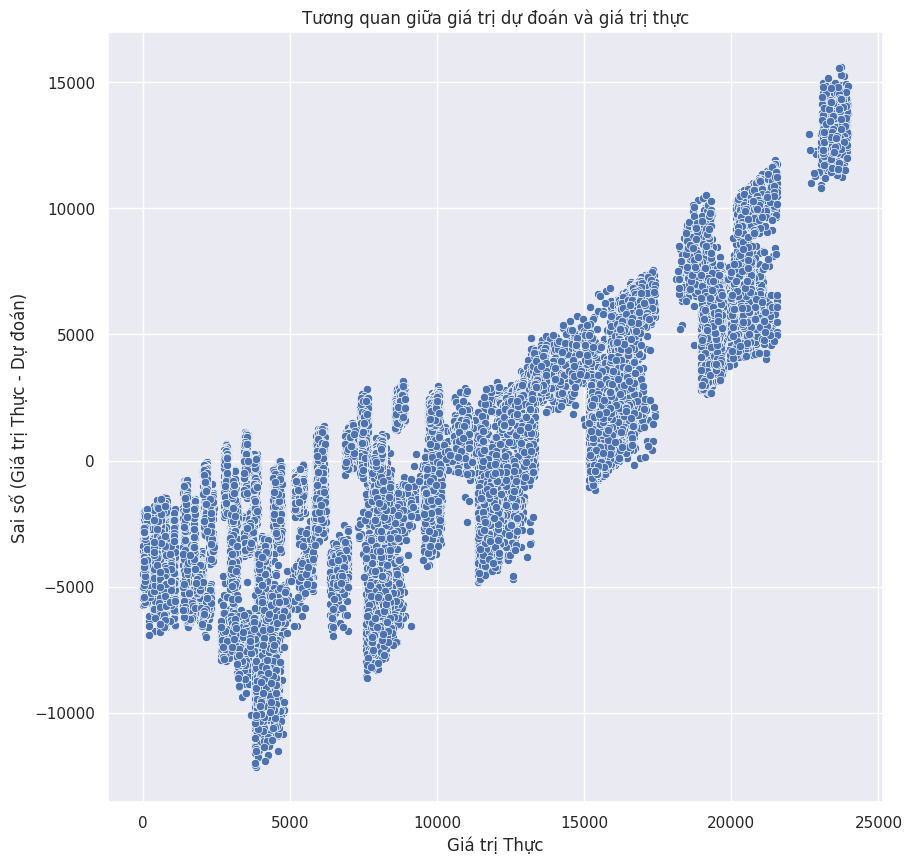

In [66]:
fig, ax = plt.subplots(figsize=(10, 10))

# Convert to Pandas DataFrame first
predictions_pd = predictions.toPandas()

# Calculate the difference column
predictions_pd['diff'] = predictions_pd['Purchase'] - predictions_pd['prediction']

# Now use the columns in scatterplot
sns.scatterplot(x='Purchase', y='diff', data=predictions_pd, ax=ax)

ax.set_title("Tương quan giữa giá trị dự đoán và giá trị thực")
ax.set_xlabel("Giá trị Thực")
ax.set_ylabel("Sai số (Giá trị Thực - Dự đoán)") # Updated y-axis label

plt.show()

#### **XGBoost** - Boosting

In [67]:
train_data

DataFrame[features: vector, Purchase: int]

In [68]:
!pip install findspark
import findspark
findspark.init()
findspark.find()

from xgboost.spark import SparkXGBRegressor
from pyspark.ml.evaluation import RegressionEvaluator
# Khởi tạo SparkXGBRegressor với cấu hình đã điều chỉnh
xgb_regressor = SparkXGBRegressor(
    features_col="features",
    label_col="Purchase",
    prediction_col="prediction",
    num_workers=2,  # số luồng xử lý
    max_depth=15,  #độ sâu cây
    n_estimators=30,  #số lượng cây
    subsample=1,  # sử dụng toàn bộ dữ liệu, nếu < 1 lấy ngẫu nhiên các tập
    objective="reg:squarederror", # hàm mục tiêu
    missing=0
)

# Train model
xgb_model = xgb_regressor.fit(train_data)

# Dự đoán trên tập validation
predictions = xgb_model.transform(valid_data)

# Hiển thị kết quả dự đoán
predictions.select("Purchase", "prediction").show(20)

# Đánh giá mô hình với RMSE
evaluator = RegressionEvaluator(labelCol="Purchase", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on validation data: {rmse}")

INFO:XGBoost-PySpark:Running xgboost-2.1.2 on 2 workers with
	booster params: {'objective': 'reg:squarederror', 'device': 'cpu', 'max_depth': 15, 'subsample': 1, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 30}
	dmatrix_kwargs: {'nthread': 1, 'missing': 0.0}
INFO:XGBoost-PySpark:Finished xgboost training!


+--------+-----------------+
|Purchase|       prediction|
+--------+-----------------+
|   19536|  16741.974609375|
|   11937|    10958.5078125|
|    8336|  16116.541015625|
|   15690|    10938.0078125|
|    8233|      8402.703125|
|    8221|  8454.5517578125|
|    3461|2973.720458984375|
|    4056| 4288.65380859375|
|    3940| 7818.70751953125|
|   11682|  11001.662109375|
|    4316|  12573.392578125|
|   15214|  12573.392578125|
|   15287| 11492.5947265625|
|    6557|   7959.478515625|
|    6443|  9422.2900390625|
|   12872|  9422.2900390625|
|    9892| 13699.4287109375|
|   15937|   15604.72265625|
|    7822|    6869.15234375|
|    8067|    6869.15234375|
+--------+-----------------+
only showing top 20 rows

Root Mean Squared Error (RMSE) on validation data: 2968.8349702676674


In [69]:
from pyspark.ml.evaluation import RegressionEvaluator
# Đánh giá mô hình với RMSE, MAE và R2
evaluator_rmse = RegressionEvaluator(labelCol="Purchase", predictionCol="prediction", metricName="rmse")
evaluator_mae = RegressionEvaluator(labelCol="Purchase", predictionCol="prediction", metricName="mae")
evaluator_r2 = RegressionEvaluator(labelCol="Purchase", predictionCol="prediction", metricName="r2")

# Tính RMSE, MAE và R2 trên tập validation
rmse = evaluator_rmse.evaluate(predictions)
mae = evaluator_mae.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)

# In kết quả đánh giá
print(f"Root Mean Squared Error (RMSE) on validation data: {rmse}")
print(f"Mean Absolute Error (MAE) on validation data: {mae}")
print(f"R-squared (R2) on validation data: {r2}")

Root Mean Squared Error (RMSE) on validation data: 2968.8349702676674
Mean Absolute Error (MAE) on validation data: 2171.2883913583373
R-squared (R2) on validation data: 0.649231840367694


(0.0, 25000.0)

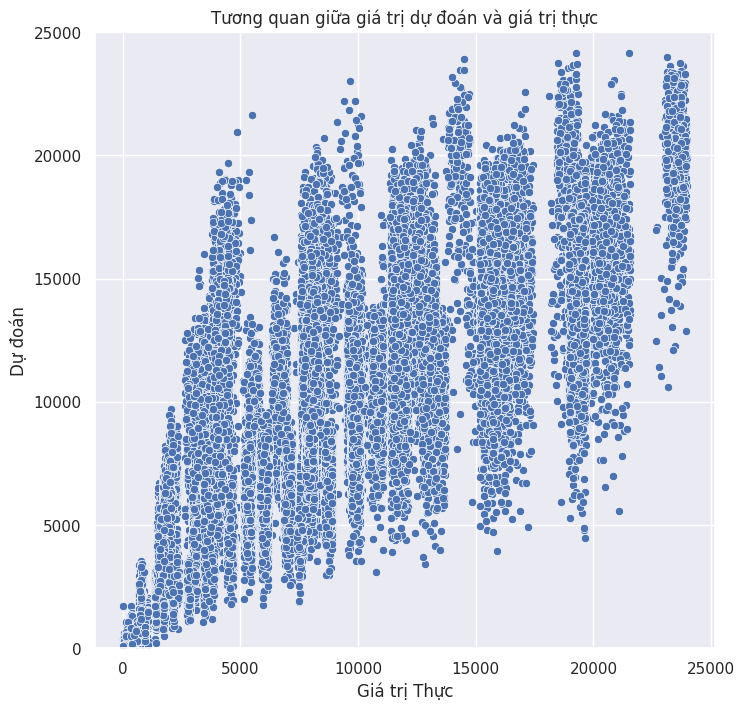

In [70]:
fig , ax = plt.subplots(figsize=(8, 8))  # Điều chỉnh kích thước biểu đồ
sns.scatterplot(x="Purchase", y="prediction", data=predictions.toPandas(), ax=ax)
ax.set_title("Tương quan giữa giá trị dự đoán và giá trị thực")
ax.set_xlabel("Giá trị Thực")
ax.set_ylabel("Dự đoán")
ax.set_ylim(0,25000)

**1. Nhận xét:**

> **Tương quan** ✅: Hầu hết các điểm dữ liệu đều tập trung quanh đường chéo tưởng tượng từ góc dưới bên trái (giá trị thấp) đến góc trên bên phải (giá trị cao).

> **Độ phân tán**: Các điểm phân tán khá rộng so với đường chéo lý tưởng. Đặc biệt, có một số điểm nằm khá xa so với đường chéo, cho thấy có các trường hợp dự đoán lệch đáng kể.

> **Biến thiên lớn tại các mức giá trị cao**: Ở những giá trị thực cao hơn (trên khoảng 10,000), các điểm có xu hướng phân tán rộng hơn. Điều này có thể chỉ ra rằng mô hình dự đoán kém chính xác hơn đối với các giá trị thực lớn.

> **Một số ngoại lệ**: Có một số điểm nằm cách xa đường chéo, có thể là các ngoại lệ hoặc các điểm dữ liệu mà mô hình khó dự đoán chính xác. Điều này có thể ảnh hưởng đến RMSE và MAE của mô hình.



---


**2. Cải thiện:**

> **Kiểm tra dữ liệu ngoại lệ**: Xác định và kiểm tra các điểm dữ liệu có sai số lớn, xem liệu chúng có đặc điểm gì bất thường không. Có thể thử loại bỏ hoặc điều chỉnh dữ liệu ngoại lệ.

> **Cải tiến mô hình**: Thử các kỹ thuật điều chỉnh siêu tham số hoặc sử dụng các mô hình khác phức tạp hơn để xem liệu có thể cải thiện độ chính xác hay không.






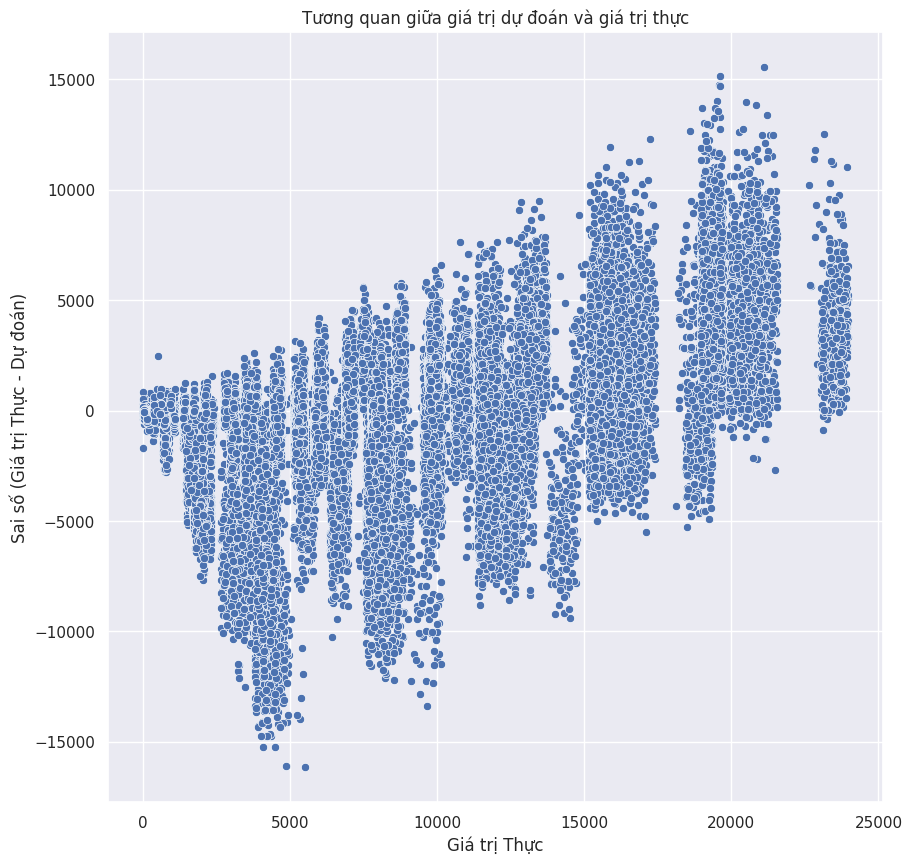

In [71]:
fig, ax = plt.subplots(figsize=(10, 10))

# Convert to Pandas DataFrame first
predictions_pd = predictions.toPandas()

# Calculate the difference column
predictions_pd['diff'] = predictions_pd['Purchase'] - predictions_pd['prediction']

# Now use the columns in scatterplot
sns.scatterplot(x='Purchase', y='diff', data=predictions_pd, ax=ax)

ax.set_title("Tương quan giữa giá trị dự đoán và giá trị thực")
ax.set_xlabel("Giá trị Thực")
ax.set_ylabel("Sai số (Giá trị Thực - Dự đoán)") # Updated y-axis label

plt.show()

####  **Mạng nơ-ron tuần tự (Sequential)**

In [72]:
df_train_dl = df_train.toPandas()
df_test_dl = df_test.toPandas()

In [73]:
df_train_dl = df_train_dl.iloc[:,2:]
df_test_dl = df_test_dl.iloc[:,2:]


In [74]:
df_train_dl.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [75]:
X_dl = df_train_dl.drop("Purchase", axis=1)
y_dl = df_train_dl["Purchase"]

In [76]:
from sklearn.model_selection import train_test_split
X_train_dl, X_valid_dl, y_train_dl, y_valid_dl = train_test_split(X_dl, y_dl, test_size=0.3, random_state=42)

In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Xác định các bước xử lý
numerical_transformer = StandardScaler()  # Chuẩn hóa cho cột số
categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # One-hot encoding cho cột phân loại

# Sử dụng ColumnTransformer để kết hợp các bước xử lý
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),  # Áp dụng cho cột số
        ('cat', categorical_transformer, categorical_features)  # Áp dụng cho cột phân loại
    ]
)

# Chuẩn hóa tập dữ liệu
X_train_dl = preprocessor.fit_transform(X_train_dl)
X_valid_dl = preprocessor.transform(X_valid_dl)


In [78]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Xây dựng kiến trúc mô hình
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_dl.shape[1],)),
    BatchNormalization(), # ổn định và tăng tốc quá trình huấn luyện.
    Dropout(0.3), # ngăn overfitting: bỏ qua một số neuron trong quá trình huấn luyện.
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='linear') #1 neuron và hàm kích hoạt tuyến tính (linear): bài toàn hồi quy
])

# Biên dịch mô hình
# sử dụng hàm mất mát Mean Squared Error: phù hợp hồi quy, theo dõi MAE (Mean Absolute Error) trong quá trình huấn luyện.
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()
# Huấn luyện mô hình
history = model.fit(
    X_train_dl, y_train_dl,
    validation_data=(X_valid_dl, y_valid_dl),
    epochs=10, # huấn luyện mô hình trong 10 epoch (vòng lặp qua toàn bộ dữ liệu huấn luyện).
    batch_size=32, # cập nhật trọng số của mô hình sau mỗi 32 mẫu dữ liệu.
    verbose=1
)

# Đánh giá mô hình
results = model.evaluate(X_valid_dl, y_valid_dl, verbose=1)
print("Validation Loss:", results[0])
print("Validation MAE:", results[1])

# Dự đoán với mô hình
predictions = model.predict(X_valid_dl)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,337 (181.00 KB)

 Trainable params: 45,569 (178.00 KB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/10
12033/12033 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - loss: 31395842.0000 - mae: 4070.2217 - val_loss: 11171588.0000 - val_mae: 2491.1025
Epoch 2/10
12033/12033 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 12184366.0000 - mae: 2624.8586 - val_loss: 9645452.0000 - val_mae: 2355.8877
Epoch 3/10
12033/12033 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 11185243.0000 - mae: 2523.7627 - val_loss: 9781844.0000 - val_mae: 2372.7417
Epoch 4/10
12033/12033 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - loss: 10900121.0000 - mae: 2494.8855 - val_loss: 9605878.0000 - val_mae: 2350.1533
Epoch 5/10
12033/12033 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - loss: 10784902.0000 - mae: 2479.9058 - val_loss: 9439875.0000 - val_mae: 2327.7061
Epoch 6/10
12033/12033 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - loss: 10635339.0000 - mae: 2462.4314 - val_loss: 9558849.0000 - val_mae: 2359.9495
Epoch 7/10
12033/12033 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - loss: 10540246.0000 - mae: 2455.2095 - val_loss: 9358840.0000 - val_mae: 2330.0720
Epoch

In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Tính toán RMSE, MAE và R2
rmse = mean_squared_error(y_valid_dl, predictions, squared=False)  # squared=False for RMSE
mae = mean_absolute_error(y_valid_dl, predictions)
r2 = r2_score(y_valid_dl, predictions)

# In kết quả đánh giá
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 3113.2014196394725
Mean Absolute Error (MAE): 2370.692174833585
R-squared (R2): 0.6154305934906006


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### **`Dự đoán trên tập test`**

In [80]:
pipeline_model = pipeline.fit(df_train)
df_transformed_test = pipeline_model.transform(df_test)
T = df_transformed_test.select(["features"])

# Dự đoán trên tập test
test_predictions = xgb_model.transform(T)

# Hiển thị kết quả dự đoán
# test_predictions.show()
test_predictions.select("prediction").show()

+----------------+
|      prediction|
+----------------+
| 16534.255859375|
| 10582.142578125|
|8038.72119140625|
|2706.67236328125|
|3126.06884765625|
| 9811.8232421875|
| 10646.611328125|
|   9439.12109375|
|  17554.11328125|
|5381.99169921875|
|    13799.734375|
|5642.45458984375|
|   6239.01953125|
|5642.45458984375|
|   21653.6484375|
|15353.8974609375|
| 16502.552734375|
|6178.51416015625|
|6703.41943359375|
|7562.84814453125|
+----------------+
only showing top 20 rows



Text(0, 0.5, 'Tần suất')

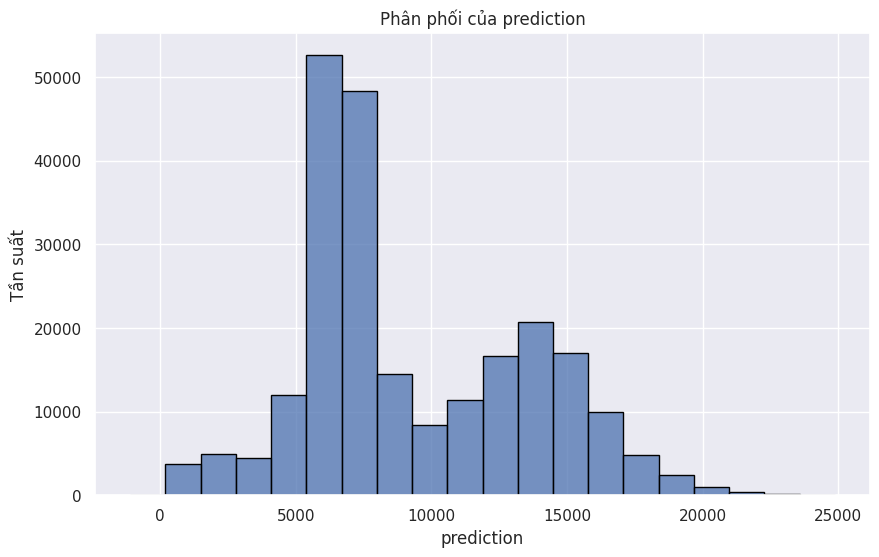

In [81]:
purchase_prediction = test_predictions.select("prediction").toPandas()

# Vẽ biểu đồ cột
fig , ax = plt.subplots(figsize=(10, 6))  # Điều chỉnh kích thước biểu đồ
sns.histplot(purchase_prediction["prediction"], bins=20, edgecolor="black", ax=ax)  # Use histplot
ax.set_title("Phân phối của prediction")
ax.set_xlabel("prediction")
ax.set_ylabel("Tần suất")

## **`Decision`**

**1. Định giá sản phẩm hợp lý:**
> **`Nhận xét`:**
Nếu phần lớn các giá trị dự đoán nằm trong khoảng `5000 - 10000`, có nghĩa là khách hàng sẵn sàng trả nhiều trong khoảng này. Đối với các sản phẩm có giá trị dự đoán ở mức cao hơn, như trên `15000`, có thể là các sản phẩm cao cấp hoặc có thêm tính năng đặc biệt.

> **`Quyết định`:** Cân nhắc chia sản phẩm thành các phân khúc giá, ví dụ: `bình dân (dưới 5000)`, `trung cấp (5000-10000)`, và `cao cấp (trên 10000)`. Điều này giúp tối ưu hóa chiến lược định giá và phân loại sản phẩm theo nhu cầu khách hàng.

**2. Tạo chiến lược khuyến mãi:**
> **`Nhận xét`**: Với mức giá `trên 10000`, có vẻ ít khách hàng hơn sẵn sàng trả cho sản phẩm. Điều này có thể là do giới hạn ngân sách hoặc vì khách hàng không thấy sản phẩm tương xứng với mức giá.

> **`Quyết định`**: Áp dụng các chương trình khuyến mãi, giảm giá hoặc gói thanh toán trả góp cho các sản phẩm có giá cao để thúc đẩy khả năng mua hàng. Ví dụ, cung cấp `chiết khấu 5-10%` cho sản phẩm trên `10000` để tăng sức hấp dẫn.

**3. Phát triển sản phẩm mới hoặc điều chỉnh sản phẩm hiện có:**
> **`Nhận xét`**: Nếu các dự đoán cho thấy khách hàng chủ yếu trả trong khoảng `5000 - 10000`, điều đó có thể phản ánh mức giá mà họ cảm thấy hợp lý. Điều này cũng chỉ ra tiềm năng lớn ở phân khúc giá này.

> **`Quyết định`**: Tập trung phát triển hoặc tinh chỉnh các sản phẩm có chi phí sản xuất và bán trong khoảng `5000 - 10000`, vì đây là phân khúc mà khách hàng có khả năng mua cao nhất. Điều này có thể tối ưu hóa doanh thu bằng cách nhắm vào nhu cầu phổ biến.

**4. Tối ưu hóa quảng cáo cho từng phân khúc:**
> **`Nhận xét`**: Biểu đồ dự đoán cho thấy sự tập trung vào các giá trị thấp và trung bình. Đối với các sản phẩm cao cấp, cần có chiến lược quảng bá khác biệt để tiếp cận đối tượng khách hàng sẵn sàng chi trả cao hơn.

> **`Quyết định`**: Phân bổ ngân sách quảng cáo hiệu quả bằng cách tập trung quảng bá rộng rãi cho các sản phẩm `phổ thông` và nhắm vào các nhóm khách hàng cụ thể cho các sản phẩm `cao cấp`. Ví dụ, dùng quảng cáo trực tuyến nhắm đến đối tượng khách hàng có thu nhập cao cho các sản phẩm trên `15000`.

**5. Phân tích nhu cầu và điều chỉnh cung ứng:**
> **`Nhận xét`**: Các sản phẩm có giá cao không được dự đoán nhiều, cho thấy có thể nhu cầu thực tế cho các sản phẩm này thấp.

> **`Quyết định`**: Điều chỉnh lượng cung ứng cho phù hợp, đảm bảo tập trung sản xuất và tồn kho cho các sản phẩm có mức giá phổ biến. Đối với các sản phẩm cao cấp, có thể giảm số lượng hàng tồn kho để tối ưu hóa chi phí lưu kho.

In [82]:
# !pip install --upgrade pip # Make sure pip is up-to-date
# !pip install xgboost # Install XGBoost library
# !pip install pyspark[sql] # Install PySpark with SQL support, if not already installed